In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
filename  = '/global/u2/b/bpb/repos/envnet/results/full_build_20250908_181404/ms2_results/ms2_deconvoluted_annotations.parquet'
# read first 10 rows of a parquet file
cols = ['ms2_data_index_deconvoluted_match', 'temp_index','ref_deconvoluted_match','score_deconvoluted_match', 'matches_deconvoluted_match',
       'precursor_mz_query_deconvoluted_match',
       'precursor_mz_ref_deconvoluted_match', 'mz_diff_deconvoluted_match',
       'rt', 'count','precursor_mz', 'filename', 'basename',
       'nearest_precursor', 'mz_diff', 'annotation_method', 'spectrum_type',
       'confidence_level']
df = pd.read_parquet(filename, columns=cols)
df.sort_values('score_deconvoluted_match', ascending=False, inplace=True)
df.drop_duplicates(subset=['filename','ref_deconvoluted_match'], keep='first', inplace=True)

ref_dir="/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404"
metadata_filename = os.path.join(ref_dir,'input_for_annotation.csv')
metadata_df = pd.read_csv(metadata_filename)
df = pd.merge(df,metadata_df[['h5','environmental_subclass']],left_on='filename', right_on='h5', how='left')

df.head()
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(filename)
# # Get an iterator for the first row group and read it as a batch
# first_rows_batch = next(pf.iter_batches(batch_size=10))
# # Convert the batch to a pandas DataFrame
# df_first_10 = first_rows_batch.to_pandas()
# df_first_10.columns



,ms2_data_index_deconvoluted_match,temp_index,ref_deconvoluted_match,score_deconvoluted_match,matches_deconvoluted_match,precursor_mz_query_deconvoluted_match,precursor_mz_ref_deconvoluted_match,mz_diff_deconvoluted_match,rt,count,precursor_mz,filename,basename,nearest_precursor,mz_diff,annotation_method,spectrum_type,confidence_level,h5,environmental_subclass
0,1510750,17309,20582,5.689445,49.0,182.996951,182.996951,0.000000,12.254275,7,182.996951,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep2.h5,182.996951,0.000000,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
1,4065919,17309,20582,5.689445,49.0,182.996951,182.996951,0.000000,12.254275,7,182.996951,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep2.h5,182.996951,0.000000,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
2,1548347,18955,20582,5.221710,41.0,182.995160,182.996951,0.001791,12.208813,7,182.995160,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A5M_Neg_MS2_rep2.h5,182.993707,0.001453,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
3,4103516,18955,20582,5.221710,41.0,182.995160,182.996951,0.001791,12.208813,7,182.995160,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A5M_Neg_MS2_rep2.h5,182.993707,0.001453,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150
4,4053649,16143,20582,5.062734,41.0,182.994975,182.996951,0.001975,11.536721,7,182.994975,/global/cfs/cdirs/metatlas/projects/envnet_bui...,DOM_Interlab-LCMS_Lab19_A45M_Neg_MS2_rep1.h5,182.993707,0.001268,MS2_deconvoluted_spectral_match,deconvoluted,High,/global/cfs/cdirs/metatlas/projects/envnet_bui...,ENVO:00002150


In [31]:
env_classes = pd.read_csv('/global/homes/b/bpb/repos/envnet/envnet/data/envo_relationships.csv')
env_classes

,name,id,common parent id,common parent name
0,agricultural soil,ENVO:00002259,ENVO:00001998,soil
1,coastal sea water,ENVO:00002150,ENVO:00002149,sea water
2,desert sand,ENVO:00005800,ENVO:00005800,soil
3,forest soil,ENVO:00002261,ENVO:00001998,soil
4,fresh water,ENVO:00002011,ENVO:00002006,fresh water
5,groundwater,ENVO:01001004,ENVO:00002006,fresh water
6,humic lake,ENVO:01001021,ENVO:01001021,fresh water
7,IHSS Reference Standards,Suwannee River Fulvic Acid Standard II,DOM Standard,IHSS Reference Standards
8,IHSS Reference Standards,Suwannee River Fulvic Acid Standard III,DOM Standard,IHSS Reference Standards
9,IHSS Reference Standards,Suwannee River Fulvic Acid Standard III,DOM Standard,IHSS Reference Standards


In [32]:
env_df = df.drop_duplicates(subset=['environmental_subclass','ref_deconvoluted_match'], keep='first')
env_df = pd.merge(env_df, env_classes, left_on='environmental_subclass', right_on='id', how='left')

<BarContainer object of 4 artists>

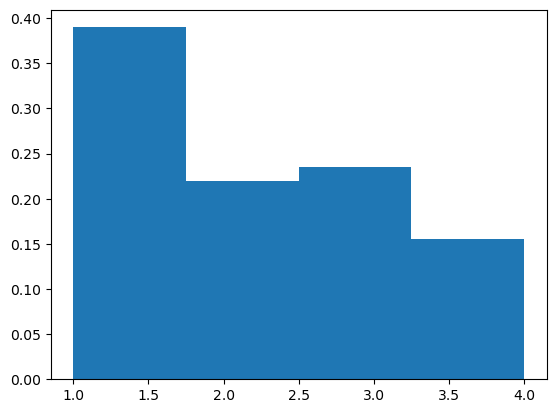

In [52]:
import numpy as np
fig,ax = plt.subplots()
x = env_df.groupby('ref_deconvoluted_match')['common parent name'].nunique()
y,x = np.histogram(x.values,bins=4)
y = y / df['ref_deconvoluted_match'].nunique()
# ax.set_xlabel('Number of environmental classes matched')
# ax.set_yscale('log')
ax.bar(x[:-1],y,width=np.diff(x), align='edge')


In [ ]:

filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
df = pd.read_csv(filename)
# replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
for c in df.columns:
    df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
df = df[~df['parquet'].str.contains('MSV000081030')]
idx = df['parquet'].str.contains('_deconvoluted.parquet')
df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)
df['lcmsrun_observed'] = df['h5'].apply(lambda x: x.replace('.h5',''))
df['lcmsrun_observed'] = df['lcmsrun_observed'].str.replace('/global/cfs/cdirs/metatlas/projects/envnet_build_files/','', regex=False)
df['original_file_type'] = 'h5'
output_path = '/global/homes/b/bpb/repos/envnet/results/full_build_20250908_181404'
output_filename = os.path.join(output_path,'input_for_annotation.csv')
df.to_csv(output_filename, index=False)
print(f'Wrote {output_filename} with {len(df)} rows')

In [ ]:


# use recursive find to get all parquet files
# use linux find since it is much faster than glob
cmd = "find /global/cfs/cdirs/metatlas/projects/envnet_build_files/ -name '*_deconvoluted.parquet'"
# run command
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
files = result.stdout.splitlines()
len(files)
files = [f for f in files if "MSV000081030" not in f] # MetaboLights MTBLS144 - GNPS Dissolved organic matter produced by Thalassiosira pseudonana


# filename = '/global/homes/b/bpb/repos/envnet/scripts/my_files.csv'
# df = pd.read_csv(filename)
# # replace all text having 'carbon_network/raw_data' with 'envnet_build_files' in the entire dataframe
# for c in df.columns:
#     df[c] = df[c].str.replace('carbon_network/raw_data', 'envnet_build_files', regex=False)
# df = df[~df['parquet'].str.contains('MSV000081030')]
# idx = df['parquet'].str.contains('_deconvoluted.parquet')
# df.loc[~idx,'parquet'] = df.loc[~idx,'parquet'].str.replace('.parquet','_deconvoluted.parquet', regex=False)

# print(df.shape)
# df.to_csv('/global/homes/b/bpb/repos/envnet/scripts/build_files.csv', index=False)
# for f in df.head()['parquet'].tolist():
#     print(f)
#     print(os.path.exists(f))

In [ ]:
# # remove MSV000081030 files.  These seem to be not environmental

print(len(files))
# files = [f for f in files if "MSV000088008" not in f]

# # files = [f for f in files if "DOM_Interlab-LCMS_Lab024" not in f]
# len(files)

In [ ]:
import os
for f in files:
    mzml_filename = f.replace("_deconvoluted.parquet", ".mzML")
    h5_filename = f.replace("_deconvoluted.parquet", ".h5")
    if not os.path.exists(mzml_filename):
        print(f)
    if not os.path.exists(h5_filename):
        print(f)